In [1]:
import napari
from napari_assistant._gui._Assistant import Assistant
from napari_assistant._categories import CATEGORIES
from skimage.io import imread

viewer = napari.Viewer()
viewer.add_image(imread(r"C:\Users\ryans\OneDrive\Desktop\blobs.tif"))

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'Image' at 0x2ef930a51c0>

2022-06-14 17:53:03.255 | INFO     | napari_assistant._gui._category_widget:call_op:162 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-06-14 17:53:03.523 | INFO     | napari_assistant._gui._category_widget:call_op:162 - top_hat_box (clesperanto)(..., 10.0, 10.0, 0.0)


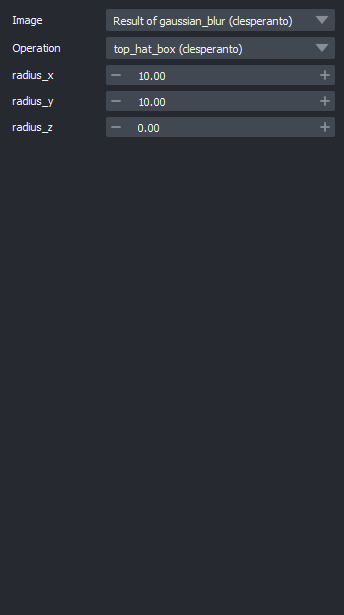

In [2]:
widget = Assistant(viewer)
viewer.window.add_dock_widget(widget)
widget._activate(CATEGORIES.get("Remove noise"))
widget._activate(CATEGORIES.get("Remove background"))

In [3]:
highlighted_categories = []
for layer, (dw, gui) in widget._layers.items():
    if layer in viewer.layers.selection:    
        if dw.name in CATEGORIES:
            dw_highlights = [
                key for key in CATEGORIES 
                if key in CATEGORIES[dw.name].next_step_suggestions
            ]
            highlighted_categories += dw_highlights
                
highlighted_categories

['Filter', 'Binarize', 'Label']

In [4]:
from napari_assistant._gui._button_grid import _get_background_brush, _get_highlight_brush

for key in CATEGORIES:
    print(key)
    try:
        widget.icon_grid.item_mapping[key].setBackground(
        _get_background_brush()
        )
    except RuntimeError:
        continue
    if key in highlighted_categories:
        widget.icon_grid.item_mapping[key].setBackground(
            _get_highlight_brush()
        )

Remove noise
Remove background
Filter
Combine
Transform
Projection
Binarize
Label
Process labels
Combine labels
Measure labels
Measure labeled image
Compare label images
Label neighbor filters
Label filters
Mesh
Measurement
Generate code...
Save and load workflows
Undo
Search napari hub
Search image.sc
Search BIII


In [5]:
widget.icon_grid.item_mapping["Label"].background()

In [6]:
for layer, (dw, gui) in widget._layers.items():
    pass